#### 【 공공데이터 분석 - 온도데이터 】
- 데이터 : 기상청 사이트

[1] 모듈 로딩 및 데이터 준비 <hr>

In [161]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [162]:
## 데이터 준비
DATA_FILE = '../data/대구_온도_2000_20251109.csv'

daeguDF = pd.read_csv(DATA_FILE, skiprows=7)
daeguDF.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2020-01-01,143,0.2,-4.9,4.6
1,\t2020-01-02,143,3.4,-1.7,7.3
2,\t2020-01-03,143,3.6,-0.8,8.6
3,\t2020-01-04,143,2.7,-2.3,8.6
4,\t2020-01-05,143,2.2,-4.3,10.2


[2] 데이터 확인 <hr>

In [163]:
## 요약 정보 확인
daeguDF.info()

## => 날짜컬럼 앞부분 '\t'공백 제거
## => 지점 컬럼 대구코드값 불필요한 컬럼 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       2140 non-null   object 
 1   지점       2140 non-null   int64  
 2   평균기온(℃)  2140 non-null   float64
 3   최저기온(℃)  2140 non-null   float64
 4   최고기온(℃)  2139 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 83.7+ KB


[3] 기본 전처리 => 불피요 컬럼과 데이터 삭제 <hr>

In [164]:
## 지점 컬럼 대구코드값 불필요한 컬럼 제거  : drop(axis=1 또는 'columns')
#daeguDF.drop('지점', axis=1)
daeguDF = daeguDF.drop(columns='지점')

In [165]:
## 날짜 컬럼에 앞에 붙은'\t'제거 => 날짜 컬럼 타입 object로 str
## 접근자 str사용
daeguDF['날짜'] = daeguDF['날짜'].str.strip()

In [166]:
daeguDF.head(3)

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2020-01-01,0.2,-4.9,4.6
1,2020-01-02,3.4,-1.7,7.3
2,2020-01-03,3.6,-0.8,8.6


[3] 세부 전처리 <hr>
- 결측치/중복값/이상치

In [167]:
## ----------------------------
## 결측치 체크
## ----------------------------
daeguDF.isna().sum()

날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    1
dtype: int64

In [168]:
# 결측치 존재 행 추출 => 필터링
msDF = daeguDF[daeguDF.isna().any(axis=1)]
msDF

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
1512,2024-02-21,5.1,3.6,NaN


In [169]:
## 데이터의 특성 즉, 기온 무작위성 X => 같은 컬럼의 값들이 서로 연결성
## 삭제하지 않고 채우기 => 이전/이후값들의 평균값으로 채우기
for idx in msDF.index:
    print(idx)
    cols = daeguDF.iloc[idx][daeguDF.iloc[idx].isna()].index

    ## 결측치 존재 행의 앞/뒤 3개행 선택 => 평균 : {컬럼명:평균값,..}
    fill_values = daeguDF[cols].iloc[idx-1:idx+2].mean(numeric_only=True).to_dict()
    daeguDF.iloc[idx] = daeguDF.iloc[idx].fillna(fill_values)

## 결측치 대체 확인
daeguDF.isna().sum()

1512


날짜         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64

In [170]:
## any() : 행/열방향으로 원소가 1개이상 True면 True
## all() : 행/열방향으로 원소가 모두 True면 True
## ★ 주의 ★
## -> 행단위일 경우 axis=1 : 행을 구성하는 모든 원소 즉, 모든 컬럼값을 확인
## -> 열단위일 경우 axis=0 : 열을 구성하는 모든 원소 즉, 모든 행의 값들 확인
daeguDF.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2135    False
2136    False
2137    False
2138    False
2139    False
Length: 2140, dtype: bool

In [171]:
## ---------------------------------------------
## 중복값 체크 : 기온 데이터는 중복 발생 가능. 유지
## ---------------------------------------------
print(daeguDF.columns)
## 20000101 ~ 20251109
daeguDF[daeguDF.duplicated(subset=daeguDF.columns[1:], keep=False)].sort_values(by=['평균기온(℃)'])

Index(['날짜', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')


,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
334,2020-11-30,3.8,0.8,8.2
756,2022-01-26,3.8,0.8,8.2
65,2020-03-06,5.4,-2.9,13.9
1530,2024-03-10,5.4,-2.9,13.9
1223,2023-05-08,13.7,5.7,21.1
471,2021-04-16,13.7,5.7,21.1
1730,2024-09-26,23.3,18.1,29.0
1346,2023-09-08,23.3,18.1,29.0
2002,2025-06-25,23.6,19.9,29.1
152,2020-06-01,23.6,19.9,29.1


In [172]:
daeguDF.iloc[:, 1:].duplicated().sum()

np.int64(6)

In [173]:
## 이상치 체크
import sys
sys.path.append(r'C:\Users\KDT\Desktop\KDT_10SL\EX_DATA_ANALYSYS\Utils')
import datautil as du

## 수치컬럼의 이상치 검사
numeric_cols = daeguDF.select_dtypes(include='number')
du.get_outlier_records(daeguDF, numeric_cols)
#du.get_outlier_records(daeguDF, daeguDF.columns[1:])

[]

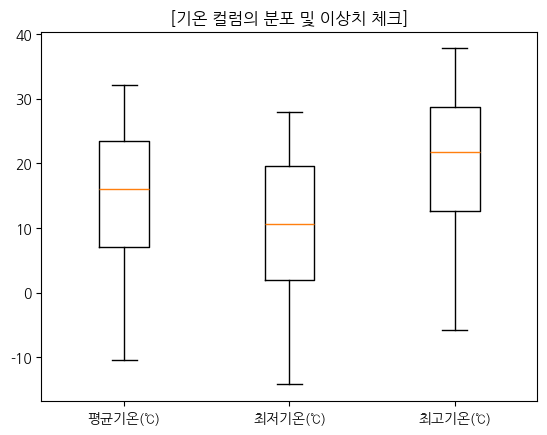

In [174]:
## 컬럼별 이상치 Boxplot 체크
plt.boxplot(daeguDF[daeguDF.columns[1:]])
plt.title("[기온 컬럼의 분포 및 이상치 체크]")
plt.xticks([1,2,3], daeguDF.columns[1:])
plt.show()

[4] 탐색적분석(EDA)<hr>

In [175]:
## 날짜 컬럼 : object ==> str이지만 날짜를 의미 : datetime64[ns]
daeguDF.날짜 = pd.to_datetime(daeguDF.날짜)
print(f' {daeguDF.날짜[0]} / {type(daeguDF.날짜[0])}')

## 타입 체크
daeguDF.info()

 2020-01-01 00:00:00 / <class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       2140 non-null   datetime64[ns]
 1   평균기온(℃)  2140 non-null   float64       
 2   최저기온(℃)  2140 non-null   float64       
 3   최고기온(℃)  2140 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 67.0 KB


In [176]:
## ----------------------------------------------------------------
## 날짜 컬럼 일단위 ==> 주기 (주 W, 월 M, 분기 Q, 년도 Y)
## ----------------------------------------------------------------
## Period 배열 만들기
pr_m = pd.period_range( start=daeguDF['날짜'].iloc[0],          # 날짜 범위의 시작
                        end=daeguDF['날짜'].iloc[-1],           # 날짜 범위의 끝
                        freq='2Q')                               # 주기설정

print(pr_m, pr_m.shape, range(1, pr_m.shape[0]+1))

daeguDF['날짜'] = pd.to_datetime(daeguDF['날짜'])

PeriodIndex(['2020Q1', '2020Q3', '2021Q1', '2021Q3', '2022Q1', '2022Q3',
             '2023Q1', '2023Q3', '2024Q1', '2024Q3', '2025Q1', '2025Q3'],
            dtype='period[2Q-DEC]') (12,) range(1, 13)


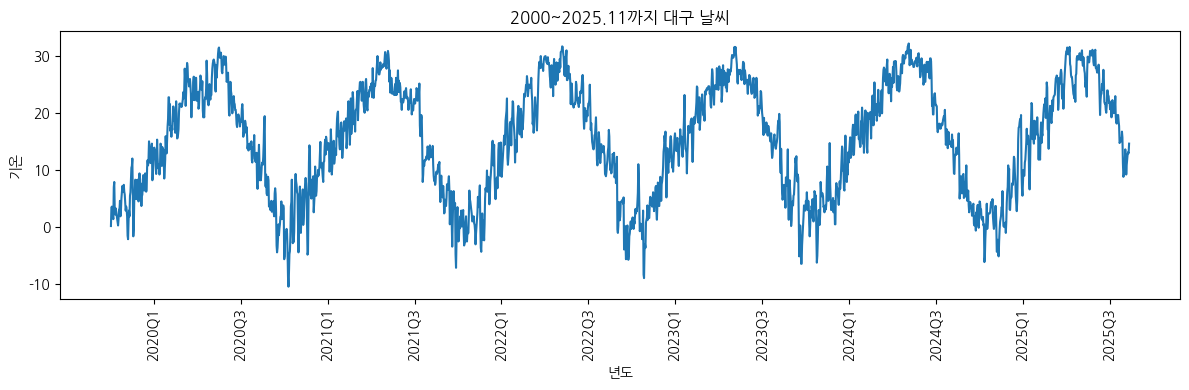

In [177]:
## 전체적인 대구시의 2000.1.1 ~ 2025.11.9까지 기온변화
## => 시간에 따른 흐름 : 선그래프
## => X축 : 날짜    Y축 : 기온 평균/최저/최고
plt.figure(figsize=(12,4))
plt.plot(daeguDF['날짜'], daeguDF['평균기온(℃)'])
plt.ylabel('기온')
plt.xlabel('년도')
plt.xticks(pr_m, pr_m, rotation=90)
plt.title('2000~2025.11까지 대구 날씨')
plt.tight_layout()
plt.show()